<a href="https://colab.research.google.com/github/jay-giametta/data-sci/blob/main/5_featureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection

Import necessary libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import matplotlib.pyplot as plt

Read the Iris dataset into a dataframe

In [2]:
iris = pd.read_csv("https://datahub.io/machine-learning/iris/r/iris.csv")

Choose feature values

In [3]:
features = iris[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]

Choose target values

In [4]:
target = iris['class']

Choose the top two out of the four available features so we can create a 2d plot



In [5]:
selector = SelectKBest(chi2, k=2)
selector.fit(features, target)
cols = selector.get_support(indices=True)

bestFeatures = features.iloc[:,cols]

dic = {'feature': features.columns, 'score': selector.scores_}
scores = pd.DataFrame(data=dic)
print(scores)

       feature       score
0  sepallength   10.817821
1   sepalwidth    3.594499
2  petallength  116.169847
3   petalwidth   67.244828


Instantiate a kmeans model

In [6]:
clusters = 3
model = KMeans(n_clusters=clusters)

Fit the model using the best features.
Note: This is unsupervised learning (no labels were given during fitting)

In [7]:
model.fit(bestFeatures)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Create a new dataframe with truth/label data



In [8]:
dic = {'truth': target, 'label': model.labels_}
classes = pd.DataFrame(data=dic)

Print labels calculated accuracy against true classes
Note: Other binary classification performance measures beyond accuracy will be covered later

In [9]:
correctGrandTotal = 0
for cluster in range(clusters):
  prediction = str(classes.loc[classes.label == cluster].truth.mode()[0])
  trueTotal = classes.truth.loc[classes.truth == prediction].count()
  correctTotal = classes.loc[classes.label == cluster].truth.value_counts()[0]
  correctGrandTotal += correctTotal

  print('cluster: ' + str(cluster) + '\nprediction: ' + prediction)
  print('accuracy: ' + str(100 * correctTotal / trueTotal) + "%\n")

print('Overall accuracy: ' + str(round(100 * correctGrandTotal / classes.shape[0], 2)) + '%')

cluster: 0
prediction: Iris-setosa
accuracy: 100.0%

cluster: 1
prediction: Iris-virginica
accuracy: 92.0%

cluster: 2
prediction: Iris-versicolor
accuracy: 96.0%

Overall accuracy: 96.0%


Create a scatter plot with the top two features

Text(0, 0.5, 'petalwidth')

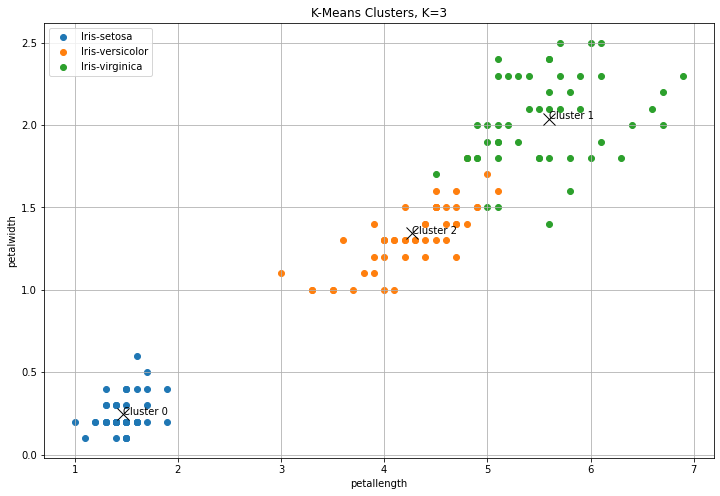

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]

xlab=features.columns[cols][0]
ylab=features.columns[cols][1]

for cls in target.unique():
    plt.scatter(x=bestFeatures.loc[target == cls][xlab],
                y=bestFeatures.loc[target == cls][ylab],
                label=cls)

for cluster in range(0,3):
  plt.annotate('Cluster ' + str(cluster), model.cluster_centers_[cluster])

  plt.plot(model.cluster_centers_[cluster][0], 
           model.cluster_centers_[cluster][1], 
           color ='black', 
           marker = 'x',
           markersize = '12')

plt.legend()
plt.grid()
plt.title('K-Means Clusters, K=3')
plt.xlabel(xlab)
plt.ylabel(ylab)